# Simulação - Caixa de supermercado

A simulação a seguir trata-se de um caixa de supermercado com um caixa, onde:

- O tempo de chegada é exponencial
- O tempo de serviço é determinístico
- Possui 1 serviço paralelo
- Não há restrições na fila
- First Come - First Served (FIFO - First In, First Out)

**Notação:** M/D/1/$\infty$/FCFS

In [1]:
# !pip install simpy

import random
import simpy

RANDOM_SEED = 231
SIM_DURATION = 200

NEW_CUSTOMERS = 30  # Número total de clientes
INTERVAL_CUSTOMERS = 3.0  # Gera clientes em um intervalo X em segundos
MIN_PATIENCE = 150  # Paciência mínima
MAX_PATIENCE = 180 # Paciência máxima


def source(env, number, interval, counter):
    # Gera clientes de forma aleatória
    for i in range(number):
        c = customer(env, f'Cliente {i:02d}', counter, time_in_market=12.0)
        env.process(c)
        t = random.expovariate(1.0 / interval)
        yield env.timeout(t)


def customer(env, name, counter, time_in_market):
    # Cliente chega, separa suas compras e passa no caixa.
    arrive = env.now
    print(f'🛒 {arrive:7.4f} {name}: *separando os produtos para compra*')
    with counter.request() as req:
        print(f'⏳ {arrive:7.4f} {name}: *entrou na fila do caixa* (tamanho da fila: {len(counter.queue)})')
        patience = random.uniform(MIN_PATIENCE, MAX_PATIENCE)
        results = yield req | env.timeout(patience)
        wait = env.now - arrive

        if req in results:
            print(f'💤 {env.now:7.4f} {name}: esperou {wait:6.3f}s na fila')
            tib = random.expovariate(1.0 / time_in_market)
            yield env.timeout(tib)
            print(f'✅ {env.now:7.4f} {name}: *finalizou as compras* (tamanho da fila: {len(counter.queue)})')
        else:
            print(f'❌ {env.now:7.4f} {name}: *desistiu em {wait:6.3f}s* (tamanho da fila: {len(counter.queue)})')

print('Caixa de supermercado')
random.seed(RANDOM_SEED)
env = simpy.Environment()

counter = simpy.Resource(env, capacity=2)
env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
env.run()

Caixa de supermercado
🛒  0.0000 Cliente 00: *separando os produtos para compra*
⏳  0.0000 Cliente 00: *entrou na fila do caixa* (tamanho da fila: 0)
💤  0.0000 Cliente 00: esperou  0.000s na fila
🛒  5.7829 Cliente 01: *separando os produtos para compra*
⏳  5.7829 Cliente 01: *entrou na fila do caixa* (tamanho da fila: 0)
💤  5.7829 Cliente 01: esperou  0.000s na fila
🛒 11.6864 Cliente 02: *separando os produtos para compra*
⏳ 11.6864 Cliente 02: *entrou na fila do caixa* (tamanho da fila: 1)
🛒 19.3034 Cliente 03: *separando os produtos para compra*
⏳ 19.3034 Cliente 03: *entrou na fila do caixa* (tamanho da fila: 2)
✅ 20.7538 Cliente 00: *finalizou as compras* (tamanho da fila: 2)
💤 20.7538 Cliente 02: esperou  9.067s na fila
✅ 22.5774 Cliente 01: *finalizou as compras* (tamanho da fila: 1)
💤 22.5774 Cliente 03: esperou  3.274s na fila
🛒 23.8054 Cliente 04: *separando os produtos para compra*
⏳ 23.8054 Cliente 04: *entrou na fila do caixa* (tamanho da fila: 1)
🛒 24.9945 Cliente 05: *sepa

# Distribuições

Em relação à probabilidade de um cliente desistir da fila, a distribuição que mais se aproxima da simulação apresentada, é a **Distribuição Gaussiana (Normal)**, na qual é aplicável em nosso caso, pois, a nossa simulação encontra-se em um caso onde a probabilidade é previsível, visto que a probabilidade de uma pessoa desistir de uma fila de supermercado é muito baixa.

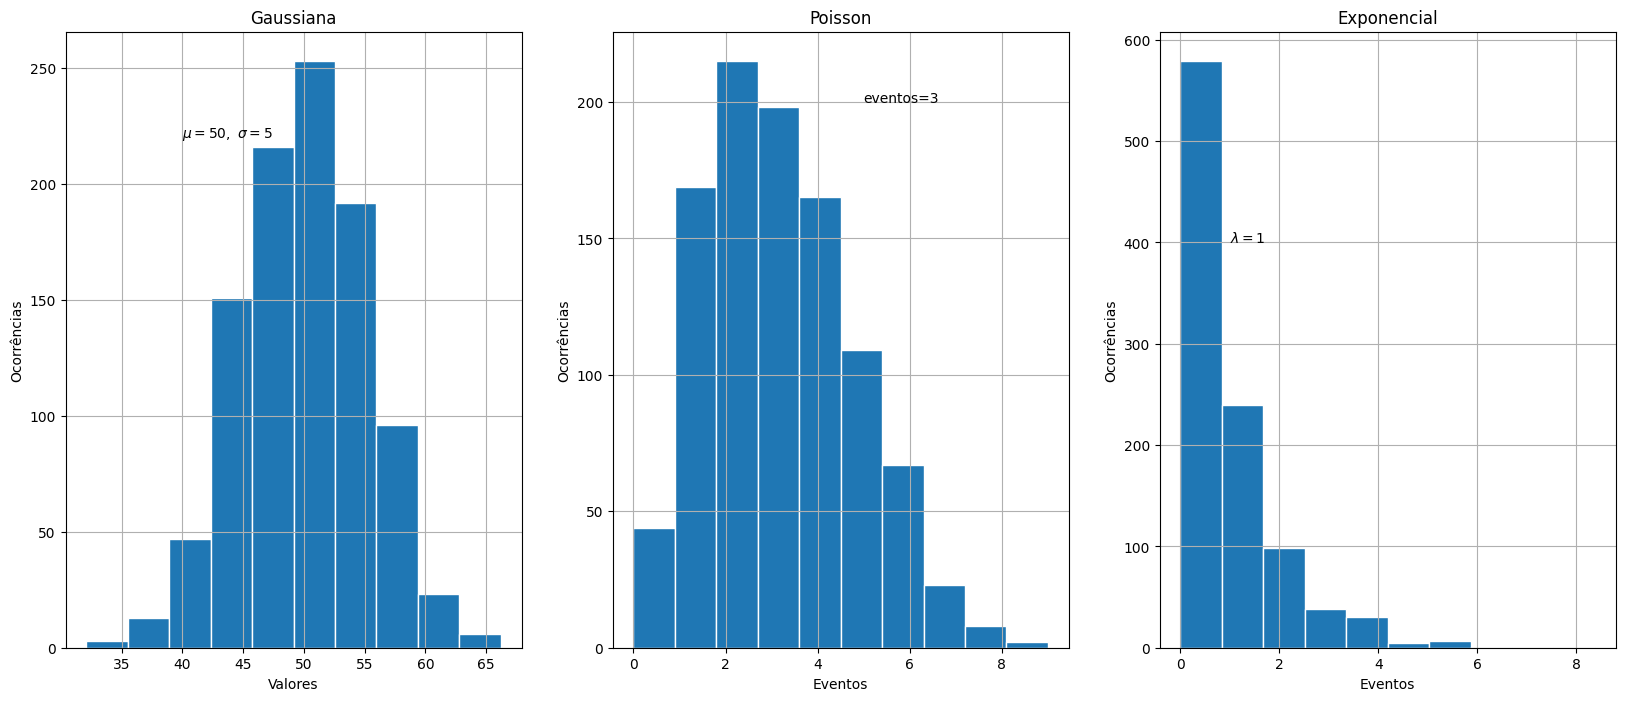

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(1,3)

fig.set_size_inches(20, 8) # tamanho largura x altura

# Gaussiana
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
# média, desvio e quantidade
media, desvio = 50, 5
x = np.random.normal(media, desvio, 1000)
ax1.text(40, 220, r'$\mu=' +str(media)+',\ \sigma='+str(desvio)+'$')
ax1.hist(x, edgecolor="white")
ax1.set_xlabel('Valores')
ax1.set_ylabel('Ocorrências')
ax1.set_title('Gaussiana')
ax1.grid()

# Poisson
eventos = 3
x = np.random.poisson(eventos, 1000)
ax2.text(eventos+2, 200, "eventos=" + str(eventos))
ax2.hist(x, edgecolor="white")
ax2.set_xlabel('Eventos')
ax2.set_ylabel('Ocorrências')
ax2.set_title('Poisson')
ax2.grid()

# Exponencial
lambdah = 1
x = np.random.exponential(lambdah,1000)
ax3.text(lambdah, 400, r'$\lambda=' + str(lambdah) + '$')
ax3.hist(x, edgecolor="white")
ax3.set_xlabel('Eventos')
ax3.set_ylabel('Ocorrências')
ax3.set_title('Exponencial')
ax3.grid()

# Referências

- [Distribuições de Probabilidade](https://colab.research.google.com/drive/1QR1WE7VStF9qgiRdgf1y_DXo2she8Nou?usp=sharing)
- [Bank Renege — SimPy 4.1.1 documentation](https://simpy.readthedocs.io/en/latest/examples/bank_renege.html)